In [1]:
# elgoss mouhcine Prediction des Notes

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [30]:
data = pd.read_csv('student-mat.csv', delimiter=';')

In [ ]:
#Partie 1 : Exploration des Données

In [31]:
print("Les 5 premières lignes du jeu de données :")
print(data.head())

Les 5 premières lignes du jeu de données :
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [33]:
stats = data[['G1', 'G2', 'G3']].describe()
print(stats)

               G1          G2          G3
count  395.000000  395.000000  395.000000
mean    10.908861   10.713924   10.415190
std      3.319195    3.761505    4.581443
min      3.000000    0.000000    0.000000
25%      8.000000    9.000000    8.000000
50%     11.000000   11.000000   11.000000
75%     13.000000   13.000000   14.000000
max     19.000000   19.000000   20.000000


In [37]:
mean_g3 = data['G3'].mean()
std_g3 = data['G3'].std()
print(f"\nMoyenne de G3 : {mean_g3:.2f}")
print(f"Écart-type de G3 : {std_g3:.2f}")


Moyenne de G3 : 10.42
Écart-type de G3 : 4.58


In [ ]:
# Partie 2 : Visualisation

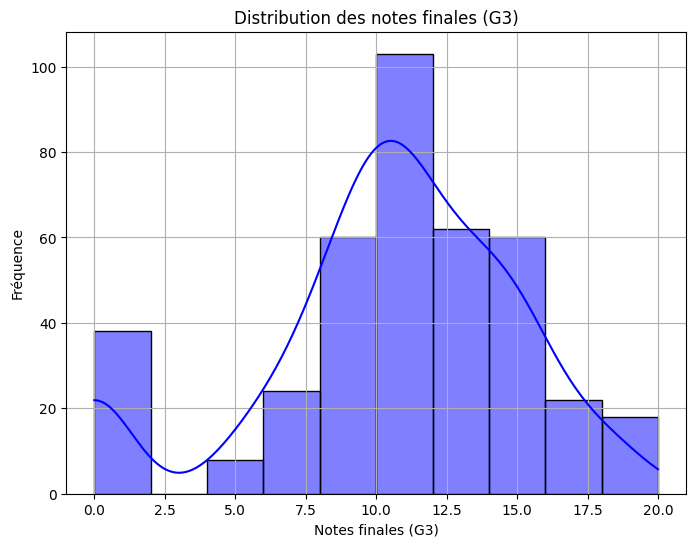

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(data['G3'], kde=True, bins=10, color='blue')
plt.title("Distribution des notes finales (G3)")
plt.xlabel("Notes finales (G3)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

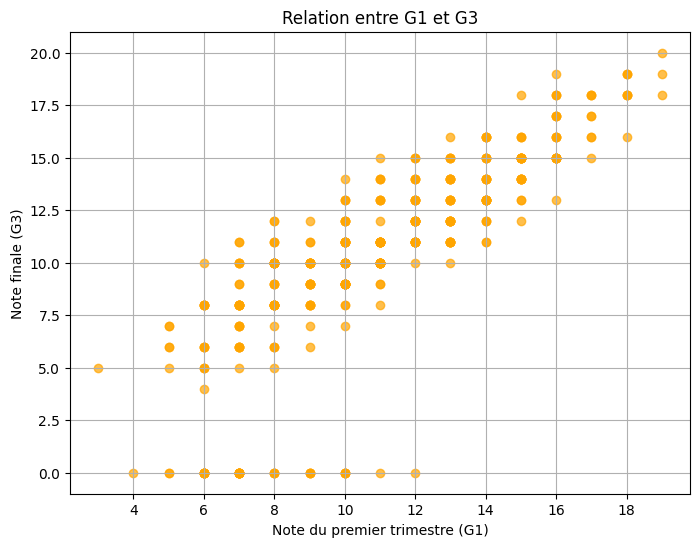

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(data['G1'], data['G3'], alpha=0.7, color='orange')
plt.title("Relation entre G1 et G3")
plt.xlabel("Note du premier trimestre (G1)")
plt.ylabel("Note finale (G3)")
plt.grid(True)
plt.show()

In [ ]:
# Partie 3 : Modélisation

In [47]:
X = data[['G1', 'G2']]  
y = data['G3']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"Score R² : {r2}")

if r2 >= 0.8:
    print("Le modèle explique plus de 80% de la variance des données, ce qui est un bon résultat.")
elif r2 >= 0.5:
    print("Le modèle explique plus de 50% de la variance des données, mais il pourrait être amélioré.")
else:
    print("Le modèle n'explique qu'une petite partie de la variance des données. Il nécessite probablement plus de travail.")


Score R² : 0.7945936216805897
Le modèle explique plus de 50% de la variance des données, mais il pourrait être amélioré.


In [55]:
new_student = pd.DataFrame([[15, 16]], columns=['G1', 'G2'])

# Predicting the final grade (G3)
predicted_g3 = model.predict(new_student)[0]

print(f"\nPrédiction pour un étudiant ayant G1=15 et G2=16 : G3 = {predicted_g3:.2f}")


Prédiction pour un étudiant ayant G1=15 et G2=16 : G3 = 16.30
